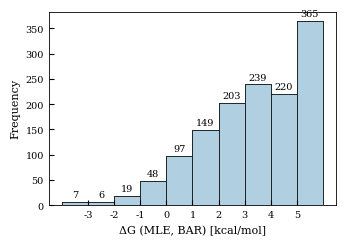

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit.Chem import PandasTools

# スタイル設定（論文向け）
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 8,
    "axes.labelsize": 8,
    "axes.titlesize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "lines.linewidth": 1,
    "axes.linewidth": 0.6
})

# SDFファイルの読み込み
sdf_path = "Step3_core4_Mpocket_NES_ADME.sdf"
df = PandasTools.LoadSDF(sdf_path)

# 数値化（エラーはNaNに）
df["r_user_DG(MLE)_BAR"] = pd.to_numeric(df["r_user_DG(MLE)_BAR"], errors="coerce")
data = df["r_user_DG(MLE)_BAR"].dropna()

# ビン境界（11点）と頻度（10個）
bin_edges = [-np.inf, -3, -2, -1, 0, 1, 2, 3, 4, 5, np.inf]
counts, _ = np.histogram(data, bins=bin_edges)

# 表示用のx座標（左端、無限の代替値をつける）
x_lefts = np.array(bin_edges[:-1])
x_lefts[0] = -4  # -inf の代替
x_lefts[-1] = 5  # +inf の代替

# 幅の計算
widths = np.array(bin_edges[1:]) - np.array(bin_edges[:-1])
widths[0] = 1   # -inf 区間の幅
widths[-1] = 1  # +inf 区間の幅

# 棒グラフ描画
fig, ax = plt.subplots(figsize=(3.5, 2.5))
ax.bar(x_lefts, counts, width=widths, align='edge',
       color="#b0cfe0", edgecolor="black", linewidth=0.5)
bars = ax.bar(x_lefts, counts, width=widths, align='edge',
              color="#b0cfe0", edgecolor="black", linewidth=0.5)

# x軸ラベル設定
xticks = [-3, -2, -1, 0, 1, 2, 3, 4, 5]
ax.set_xticks(xticks)
ax.set_xticklabels([str(x) for x in xticks])

# 軸ラベル
ax.set_xlabel("ΔG (MLE, BAR) [kcal/mol]")
ax.set_ylabel("Frequency")

# 各バーの上に個数表示
ax.bar_label(bars, labels=[str(c) for c in counts], fontsize=7, padding=2)

# 軸と枠線の設定
ax.tick_params(direction="in")
for spine in ax.spines.values():
    spine.set_visible(True)

# レイアウト調整と保存
plt.tight_layout()
plt.savefig("core4_Mpocket_NES_deltaG_histogram_bar.svg")
plt.show()


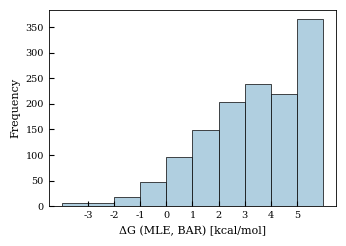

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit.Chem import PandasTools

# スタイル設定（論文向け）
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 8,
    "axes.labelsize": 8,
    "axes.titlesize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "lines.linewidth": 1,
    "axes.linewidth": 0.6
})

# SDFファイルの読み込み
sdf_path = "Step3_core4_Mpocket_NES_ADME.sdf"
df = PandasTools.LoadSDF(sdf_path)

# 数値化（エラーはNaNに）
df["r_user_DG(MLE)_BAR"] = pd.to_numeric(df["r_user_DG(MLE)_BAR"], errors="coerce")
data = df["r_user_DG(MLE)_BAR"].dropna()

# ビン境界（11点）と頻度（10個）
bin_edges = [-np.inf, -3, -2, -1, 0, 1, 2, 3, 4, 5, np.inf]
counts, _ = np.histogram(data, bins=bin_edges)

# 表示用のx座標（左端、無限の代替値をつける）
x_lefts = np.array(bin_edges[:-1])
x_lefts[0] = -4  # -inf の代替
x_lefts[-1] = 5  # +inf の代替

# 幅の計算
widths = np.array(bin_edges[1:]) - np.array(bin_edges[:-1])
widths[0] = 1   # -inf 区間の幅
widths[-1] = 1  # +inf 区間の幅

# 棒グラフ描画
fig, ax = plt.subplots(figsize=(3.5, 2.5))
ax.bar(x_lefts, counts, width=widths, align='edge',
       color="#b0cfe0", edgecolor="black", linewidth=0.5)
#bars = ax.bar(x_lefts, counts, width=widths, align='edge',
#              color="#b0cfe0", edgecolor="black", linewidth=0.5)

# x軸ラベル設定
xticks = [-3, -2, -1, 0, 1, 2, 3, 4, 5]
ax.set_xticks(xticks)
ax.set_xticklabels([str(x) for x in xticks])

# 軸ラベル
ax.set_xlabel("ΔG (MLE, BAR) [kcal/mol]")
ax.set_ylabel("Frequency")

# 各バーの上に個数表示
#ax.bar_label(bars, labels=[str(c) for c in counts], fontsize=7, padding=2)

# 軸と枠線の設定
ax.tick_params(direction="in")
for spine in ax.spines.values():
    spine.set_visible(True)

# レイアウト調整と保存
plt.tight_layout()
plt.savefig("core4_Mpocket_NES_deltaG_histogram.svg")
plt.show()


In [11]:
import pandas as pd

# データ読み込み
df = pd.read_csv("core4_R2_NES_20250416_matome_20250516.csv")

# Titleが"30849-1"の行を抽出し、S+logP列を表示
value = df.loc[df["Title"] == "30849-1", "S+logP"]

print(value)


110    2.671
Name: S+logP, dtype: float64


In [10]:
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit import Chem

sdf_path = "Step3_core4_Mpocket_NES_ADME.sdf"
df = PandasTools.LoadSDF(sdf_path)

df["r_user_DG(MLE)_BAR"] = pd.to_numeric(df["r_user_DG(MLE)_BAR"], errors="coerce")
df_neg = df[df["r_user_DG(MLE)_BAR"] < 0].copy()

smarts = "[#7]1-[#6]-[#6]2:[#6](-[#7]3-[#6]-[#6]-[#6]-[#6]-[#6]-3):[#6](-[#6]#[#7]):[#6](=[#8]):[#7&H1]:[#6]:2-[#6&H1]-[#6]-1"
pattern = Chem.MolFromSmarts(smarts)

df_neg["mol_from_smiles"] = df_neg["s_user_SMILES"].apply(Chem.MolFromSmiles)
df_neg["smarts_match"] = df_neg["mol_from_smiles"].apply(lambda mol: mol.HasSubstructMatch(pattern) if mol else False)

total_below_zero = len(df_neg)
match_count = df_neg["smarts_match"].sum()

print(f"Number of compounds with ΔG < 0: {total_below_zero}")
print(f"Number of SMARTS-matching compounds among them: {match_count}")

Number of compounds with ΔG < 0: 80
Number of SMARTS-matching compounds among them: 37


         ID  r_user_DG(MLE)_BAR  rank_DG       r_user_S+logP r_user_SBE  \
79  30849-1               -1.76     18.0  2.6710979034178202      -1.76   

    r_user_glide_gscore      r_user_S+Sw_uM    r_user_MPO_score  
79  -7.4480000000000004  582.79443268141699  2.2494320123684202  


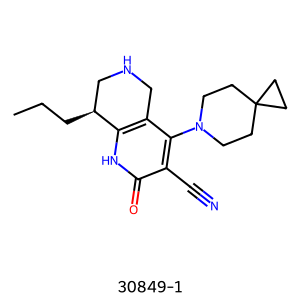

In [11]:
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem import Draw

# Load the SDF file
sdf_path = "Step3_core4_Mpocket_NES_ADME.sdf"
df = PandasTools.LoadSDF(sdf_path)

# Ensure numeric conversion for ranking
df["r_user_DG(MLE)_BAR"] = pd.to_numeric(df["r_user_DG(MLE)_BAR"], errors="coerce")

# Rank the ΔG values (lower is better)
df["rank_DG"] = df["r_user_DG(MLE)_BAR"].rank(method="min", ascending=True)

# Filter for the target compound
compound = df[df["ID"] == "30849-1"].copy()

# Extract desired fields
columns_of_interest = [
    "ID",                     # Title
    "r_user_DG(MLE)_BAR",     # Binding free energy
    "rank_DG",                # Rank of ΔG
    "r_user_S+logP",          # logP
    "r_user_SBE",             # Substituent Binding Efficiency
    "r_user_glide_gscore",    # Glide score
    "r_user_S+Sw_uM",         # Predicted solubility
    "r_user_MPO_score",       # MPO score
]

# Print properties
print(compound[columns_of_interest])

# Generate and show molecular structure from SMILES
mol = Chem.MolFromSmiles(compound["s_user_SMILES"].values[0])
Draw.MolToImage(mol, legend="30849-1")


In [14]:
import pandas as pd
from rdkit.Chem import PandasTools

# Load SDF
sdf_path = "Step3_core4_Mpocket_NES_ADME.sdf"
df = PandasTools.LoadSDF(sdf_path)

# Convert to numeric
df["r_user_SBE"] = pd.to_numeric(df["r_user_SBE"], errors="coerce")

# Rank SBE values (higher is better ⇒ descending=False gives lowest = rank 1)
df["rank_SBE"] = df["r_user_SBE"].rank(method="min", ascending=True)

# Get compound info
compound = df[df["ID"] == "30849-1"].copy()

# Show SBE value and its rank
print(compound[["ID", "r_user_SBE", "rank_SBE"]])


         ID  r_user_SBE  rank_SBE
79  30849-1       -1.76       8.0


In [15]:
import pandas as pd
from rdkit.Chem import PandasTools

# Load the SDF
sdf_path = "Step3_core4_Mpocket_NES_ADME.sdf"
df = PandasTools.LoadSDF(sdf_path)

# Convert to numeric
df["r_user_glide_gscore"] = pd.to_numeric(df["r_user_glide_gscore"], errors="coerce")

# Rank the Glide scores (lower score = better rank ⇒ ascending=True)
df["rank_glide"] = df["r_user_glide_gscore"].rank(method="min", ascending=True)

# Extract info for compound "30849-1"
compound = df[df["ID"] == "30849-1"].copy()

# Display result
print(compound[["ID", "r_user_glide_gscore", "rank_glide"]])


         ID  r_user_glide_gscore  rank_glide
79  30849-1               -7.448       877.0


In [16]:
import pandas as pd
from rdkit.Chem import PandasTools

# Load SDF
sdf_path = "Step3_core4_Mpocket_NES_ADME.sdf"
df = PandasTools.LoadSDF(sdf_path)

# Convert to numeric
df["r_user_glide_gscore"] = pd.to_numeric(df["r_user_glide_gscore"], errors="coerce")

# Exclude "13-99" and drop NaNs
df_filtered = df[(df["ID"] != "13-99") & df["r_user_glide_gscore"].notna()].copy()

# Compute GlideScore rank (lower is better)
df_filtered["rank_glide"] = df_filtered["r_user_glide_gscore"].rank(method="min", ascending=True)

# Get the rank for "30849-1"
compound = df_filtered[df_filtered["ID"] == "30849-1"]

# Display result
print(compound[["ID", "r_user_glide_gscore", "rank_glide"]])


         ID  r_user_glide_gscore  rank_glide
79  30849-1               -7.448       876.0
